### Nouran Ahmed Abd Elhameed Mohamed
### Task 6 (The Sparks Foundation Internship) 
### Create The Decision Tree Classifer and visualize it graphically

### all the pacakges needed to import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Read the dataset

In [4]:
data = pd.read_csv("iris.csv",index_col=0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Preprocessing Data (Check if there is any NULL or Duplicate Data)

### As we can see we checked over if there is any null records and the result is false so we needn't to do anything 

In [5]:
data.isnull().values.any()


False

### As we can see we checked over if there is any duplicate records and the result is true and there is 3 records are duplicated so i dropped any duplicate record

In [6]:
data.duplicated().values.any()

True

In [7]:
data.duplicated().values.sum()


3

In [8]:
data.drop_duplicates()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Encoded The target from labels into values 
### 0 for Iris-setosa, 1 for Iris-versicolor and 2 for Iris-virginica 

In [9]:
encoded_data = LabelEncoder().fit_transform(data['Species'])
encoded_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Show the correaltion between the features ranges from (-1 to +1)
### from lighter color (values closer to zero) we interpert there is no correlation between features as we go close to positive 1 (darker colors) there a strong positive correlation between the features (as one increases so does the other) and close to -1 is a strong negative correlation (as one increases the other decrease)
### at the diagonal are all 1 because the features correalted to itself



<AxesSubplot:>

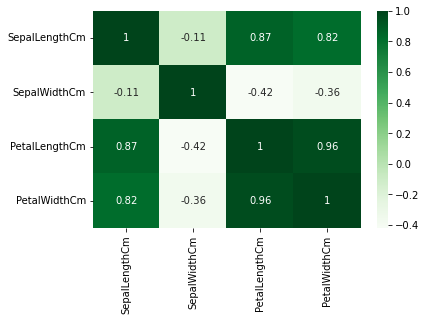

In [11]:
correlated_features=data.corr()
sns.heatmap(correlated_features,cmap='Greens',annot=True)

### We can also use the boxplot to show the distribution of the features and show if there is any outliers as the first boxplot there is in Virginica some outliers,and the second box there is also outliers in Versicolor ...) and as we go we see that these outliers are not effecting our data so we don't need to do anything to handle them

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

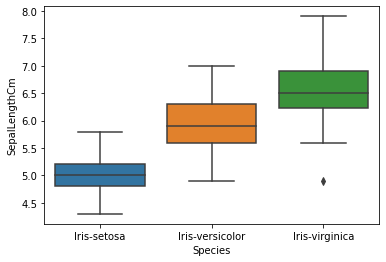

In [12]:
sns.boxplot(x = "Species", y = "SepalLengthCm", data = data)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

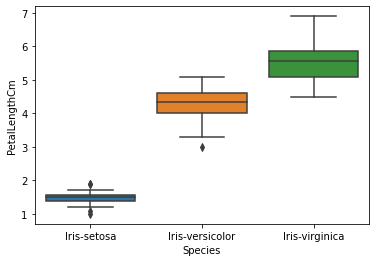

In [13]:
sns.boxplot(x = "Species", y = "PetalLengthCm", data = data)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

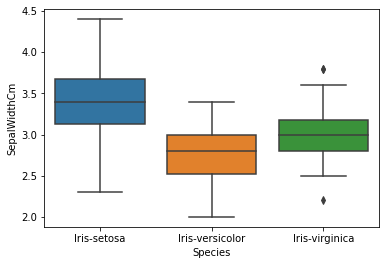

In [14]:
sns.boxplot(x = "Species", y = "SepalWidthCm", data = data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

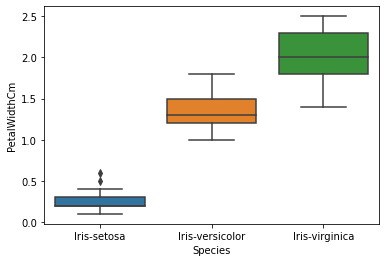

In [15]:
sns.boxplot(x = "Species", y = "PetalWidthCm", data = data)

### We divide the features and the target and visualize them showing 2 features before make any train or test on the data

In [18]:
features=data.iloc[:,:-1].values
target=encoded_data

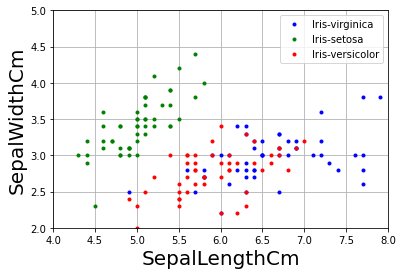

In [19]:
plt.plot(features[target==2,0],features[target==2,1],'b.')
plt.plot(features[target==0,0],features[target==0,1],'g.')
plt.plot(features[target==1,0],features[target==1,1],'r.')
plt.xlabel('SepalLengthCm', fontsize=20)
plt.ylabel('SepalWidthCm', fontsize=20)
plt.ylim(2,5)
plt.xlim(4,8)
plt.grid()
plt.legend(['Iris-virginica','Iris-setosa','Iris-versicolor'],loc='upper right')

### We need to split the data into train 80% and test 20%

In [20]:
X_train,X_Test,Y_train,Y_Test = train_test_split(features,target, train_size=0.8, random_state=10, shuffle=True)
print(np.shape(X_train),np.shape(X_Test))
Y_Test

(120, 4) (30, 4)


array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])